<a href="https://colab.research.google.com/github/hysakada/IA-FER/blob/master/Analise_Emocao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

df=pd.read_csv('drive/My Drive/TCC IA/fer2013.csv')

# print(df.info())
#print(df["Usage"].value_counts())



# print(df.head())
X_train_Pixels,X_train_Labels,Y_test_Pixels,Y_test_Labels=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train_Pixels.append(np.array(val,'float32'))
           X_train_Labels.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           Y_test_Pixels.append(np.array(val,'float32'))
           Y_test_Labels.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")



num_labels = 7
batch_size = 64
epochs = 20
width, height = 48, 48


X_train_Pixels = np.array(X_train_Pixels,'float32')
X_train_Labels = np.array(X_train_Labels,'float32')
Y_test_Pixels = np.array(Y_test_Pixels,'float32')
Y_test_Labels = np.array(Y_test_Labels,'float32')

X_train_Labels=np_utils.to_categorical(X_train_Labels, num_classes=num_labels)
Y_test_Labels=np_utils.to_categorical(Y_test_Labels, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train_Pixels -= np.mean(X_train_Pixels, axis=0)
X_train_Pixels /= np.std(X_train_Pixels, axis=0)

Y_test_Pixels -= np.mean(Y_test_Pixels, axis=0)
Y_test_Pixels /= np.std(Y_test_Pixels, axis=0)


# parametros 1°- quantidade de imagens, 2° e 3° é o tamanho da imagem e 4° se a imagem está em cinza(1 é sim)

X_train_Pixels = X_train_Pixels.reshape(X_train_Pixels.shape[0], 48, 48, 1) 

Y_test_Pixels = Y_test_Pixels.reshape(Y_test_Pixels.shape[0], 48, 48, 1)

# print(f"shape:{X_train.shape}")
##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(X_train_Pixels.shape[1:])))
model.add(Conv2D(64,kernel_size= (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
#model.add(Dropout(0.5))



#2nd convolution layer
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
#model.add(Dropout(0.5))



#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))





model.add(Flatten())

#fully connected neural networks
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(7))


model.add(Dense(num_labels, activation='softmax'))

# model.summary()


#compilando o modelo
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

#treinando o modelo
history=model.fit(X_train_Pixels, X_train_Labels,
          validation_data=(Y_test_Pixels, Y_test_Labels),
          epochs=epochs,
          shuffle=True)


#salvando o modelo para usar depois
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")





Epoch 1/20
898/898 [==============================] - 11s 13ms/step - loss: 1.8048 - accuracy: 0.3124 - val_loss: 1.5150 - val_accuracy: 0.4191
Epoch 2/20
898/898 [==============================] - 11s 12ms/step - loss: 1.4112 - accuracy: 0.4568 - val_loss: 1.3209 - val_accuracy: 0.5010
Epoch 3/20
898/898 [==============================] - 11s 13ms/step - loss: 1.2669 - accuracy: 0.5171 - val_loss: 1.2913 - val_accuracy: 0.5049
Epoch 4/20
898/898 [==============================] - 11s 12ms/step - loss: 1.1767 - accuracy: 0.5524 - val_loss: 1.2421 - val_accuracy: 0.5255
Epoch 5/20
898/898 [==============================] - 11s 12ms/step - loss: 1.1042 - accuracy: 0.5827 - val_loss: 1.1544 - val_accuracy: 0.5773
Epoch 6/20
898/898 [==============================] - 11s 12ms/step - loss: 1.0354 - accuracy: 0.6124 - val_loss: 1.1382 - val_accuracy: 0.5795
Epoch 7/20
898/898 [==============================] - 11s 13ms/step - loss: 0.9597 - accuracy: 0.6404 - val_loss: 1.1364 - val_accuracy:

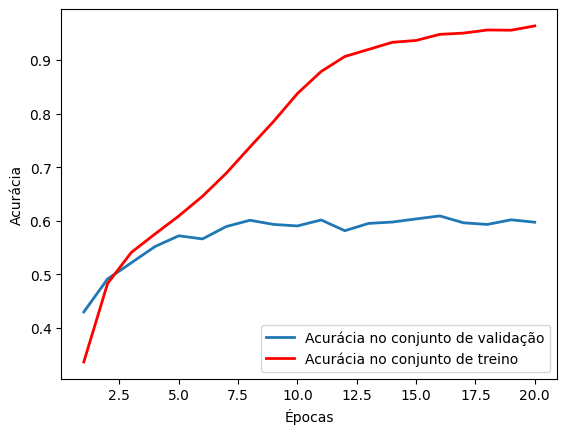

In [151]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
range_epochs = range(1, len(acc) + 1)

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy_val, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()

# New Section

In [152]:
emocoes=["bravo", "nojo", "medo", "felicidade", "tristeza", "supresa", "neutro"]



In [200]:
adivinhar=model.predict(Y_test_Pixels)
#print(y_pred)


from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

pred_list = []; actual_list = []; emo_pred=[]; emo_actual=[]
ind=0
for i in adivinhar:
 
  pred_list.append(np.argmax(i))
  emo_pred.append(emocoes[np.argmax(i)])
for i in Y_test_Labels:
 
  actual_list.append(np.argmax(i))
  emo_actual.append(emocoes[np.argmax(i)])

confusion_matrix(actual_list, pred_list)




array([[260,   1,  42,  27,  74,  18,  45],
       [ 17,  25,   5,   2,   4,   1,   2],
       [ 72,   0, 200,  25,  91,  42,  66],
       [ 49,   0,  28, 716,  31,  15,  56],
       [ 92,   0,  84,  38, 298,  17, 124],
       [ 15,   0,  26,  20,  15, 322,  17],
       [ 73,   0,  37,  55, 106,  13, 323]])

In [221]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
      
    #   print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Verídico')
    plt.xlabel('Predição')
    plt.tight_layout()


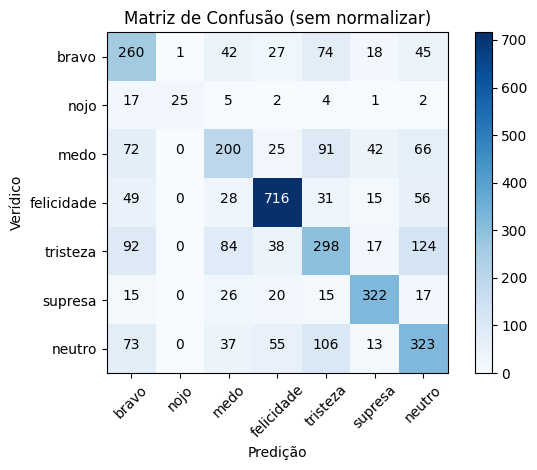

In [222]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(actual_list, pred_list)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=emocoes,
                      title='Matriz de Confusão (sem normalizar)')
plt.show()

In [223]:
from skimage import io
img = image.load_img('drive/My Drive/TCC IA/neutro.jpeg', color_mode="grayscale", target_size=(48, 48))
#img = image.load_img('sorriso.jpeg', grayscale=True, target_size=(48, 48))
#show_img=image.load_img('sorriso.jpeg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255  

resultado = model.predict(x)
#x = np.array(x, 'float32')
#x = x.reshape([48, 48]);

plt.gray()

plt.show(img)


        
print('Resultado da expressão:',emocoes[np.argmax(resultado)])

<Figure size 640x480 with 0 Axes>

Resultado da expressão: felicidade
